![Illustration of silhouetted heads](mentalhealth.jpg)

# Student Stay Duration and Score Analysis

### Problem Statement
_____

This project analyzes data on student stay durations and their corresponding scores on three important metrics:
- PHQ (Physical Health Questionnaire),
- SCS (Social Connectedness Scale),
- AS (Anxiety Scale).

The goal is to understand how these scores change based on the length of students' stays. Specifically, focus on:
- Calculating the average scores for each test, grouped by the length of stay.
- Counting the number of international students for each stay duration.
This analysis provides valuable insights into the relationship between stay duration and student well-being, which can inform student welfare programs.



### Importing of libaries and SQL connection
_____

In [1]:
# import libraries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establishing connection
conn = mysql.connector.connect(
    user='root',
    password='Password1234',
    host='localhost',
    database='student_db'
)
cursor = conn.cursor()

### Data Preview
____

The dataset contains information on student stay durations and their scores on three different scales. Below is a preview of the first few rows of the data, followed by basic summary statistics for each metric.

In [2]:
# SQL Query 
query = """
SELECT * 
FROM students
"""

# Execute the query
cursor.execute(query)
result = cursor.fetchall()

# Creating DataFrame for neat presentation
df = pd.DataFrame(result, columns=cursor.column_names)


In [4]:
# Displaying the first few rows of the data
df.head()

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,...,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24,4,5,Long,3,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28,5,1,Short,4,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25,4,6,Long,4,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29,5,1,Short,2,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28,5,1,Short,1,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No


In [5]:
# Displaying summary statistics
df.describe().round(2)

,age,age_cate,stay,japanese,english,todep,tosc,apd,ahome,aph,...,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,...,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,20.87,2.56,2.15,3.10,3.65,8.19,37.47,15.41,9.61,9.14,...,4.32,4.06,4.37,3.07,2.95,2.29,2.67,1.92,2.94,2.14
std,2.77,1.07,1.33,1.31,0.88,4.95,9.23,6.17,4.01,4.19,...,2.23,1.94,2.07,1.85,1.83,1.53,1.71,1.41,2.03,1.50
min,17.00,1.00,1.00,1.00,1.00,0.00,8.00,8.00,4.00,5.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,19.00,2.00,1.00,2.00,3.00,5.00,31.00,10.00,6.00,5.00,...,2.00,2.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
50%,20.00,2.00,2.00,3.00,4.00,8.00,40.00,16.00,9.00,9.00,...,5.00,4.00,5.00,3.00,3.00,2.00,2.00,1.00,2.00,1.00
75%,22.00,3.00,3.00,4.00,4.00,11.00,46.00,19.00,12.00,11.00,...,6.25,5.00,6.00,4.00,4.00,3.00,4.00,3.00,4.00,3.00
max,31.00,5.00,10.00,5.00,5.00,25.00,48.00,39.00,20.00,25.00,...,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00


### Data Extraction with SQL
_____

The goal of extraction is to:

- Return a table with nine rows and five columns.
- The columns should be:
  1. `stay`: The duration of stay.
  2. `count_int`: The number of international students for each stay duration.
  3. `average_phq`: The average score of the PHQ-9 test (`todep` column) for each stay, rounded to two decimal places.
  4. `average_scs`: The average score of the SCS test (`tosc` column) for each stay, rounded to two decimal places.
  5. `average_as`: The average score of the ASISS test (`toas` column) for each stay, rounded to two decimal places.
  6.  The `count_int` column will calculate the count of international students (`inter_dom = 'Inter'`) for each length of stay
  7.  The `average_phq`, `average_scs`, and `average_as` columns will calculate the averages of the respective tests for each length of stay.


**SQL Query Explanation**

The SQL query below performs the following operations:
1. **Select the stay duration (`stay`)** and count the number of international students (`COUNT(*) AS count_int`).
2. **Calculate the average scores** of three metrics—`PHQ`, `SCS`, and `AS`—using the `AVG()` function, and round each value to two decimal places.
3. **Filter the data** to only include international students (`WHERE inter_dom = 'Inter'`).
4. **Group the results** by stay duration to get the counts and averages for each group.
5. **Order the results** by stay duration in descending order for better visualization.

```sql
SELECT stay, 
       COUNT(*) AS count_int, 
       ROUND(AVG(todep), 2) AS average_phq, 
       ROUND(AVG(tosc), 2) AS average_scs, 
       ROUND(AVG(toas), 2) AS average_as
FROM students
WHERE inter_dom = 'Inter'
GROUP BY stay
ORDER BY stay DESC;
```


In [3]:
# SQL query
query = """
SELECT stay, 
       COUNT(*) AS count_int, 
       ROUND(AVG(todep), 2) AS average_phq, 
       ROUND(AVG(tosc), 2) AS average_scs, 
       ROUND(AVG(toas), 2) AS average_as
FROM students
WHERE inter_dom = 'Inter'
GROUP BY stay
ORDER BY stay DESC;
"""

# Execute the query and fetch the results
cursor.execute(query)
result = cursor.fetchall()

# Create a DataFrame from the results
df = pd.DataFrame(result, columns=['stay', 'count_int', 'average_phq', 'average_scs', 'average_as'])

# Display the DataFrame
df

,stay,count_int,average_phq,average_scs,average_as
0,10,1,13.00,32.00,50.00
1,8,1,10.00,44.00,65.00
2,7,1,4.00,48.00,45.00
3,6,3,6.00,38.00,58.67
4,5,1,0.00,34.00,91.00
5,4,14,8.57,33.93,87.71
6,3,46,9.09,37.13,78.00
7,2,39,8.28,37.08,77.67
8,1,95,7.48,38.11,72.80


### Comparison of Averages
_____

#### Bar Plot: Comparison of Averages by Stay Duration

The bar plot below compares the average scores of PHQ, SCS, and AS for each stay duration. This helps in identifying how these metrics vary across different stay durations.


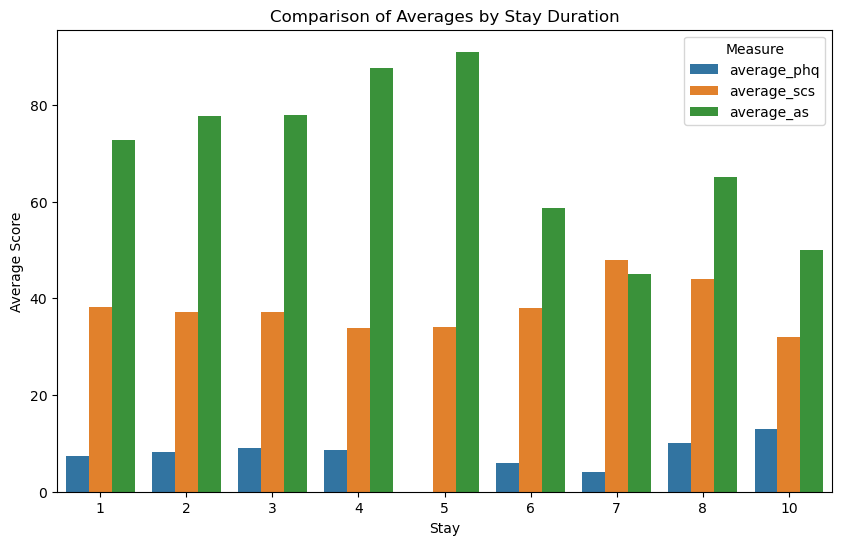

In [7]:
df_melted = df.melt(id_vars='stay', value_vars=['average_phq', 'average_scs', 'average_as'], 
                    var_name='Measure', value_name='Average')

plt.figure(figsize=(10, 6))
sns.barplot(x='stay', y='Average', hue='Measure', data=df_melted)
plt.title('Comparison of Averages by Stay Duration')
plt.xlabel('Stay')
plt.ylabel('Average Score')
plt.legend(title='Measure')
plt.show()


#### Line Plot: Trends of Averages by Stay Duration

The line plot below visualizes how the average scores change as the duration of students' stays increases or decreases. This helps in understanding any patterns or trends over time.


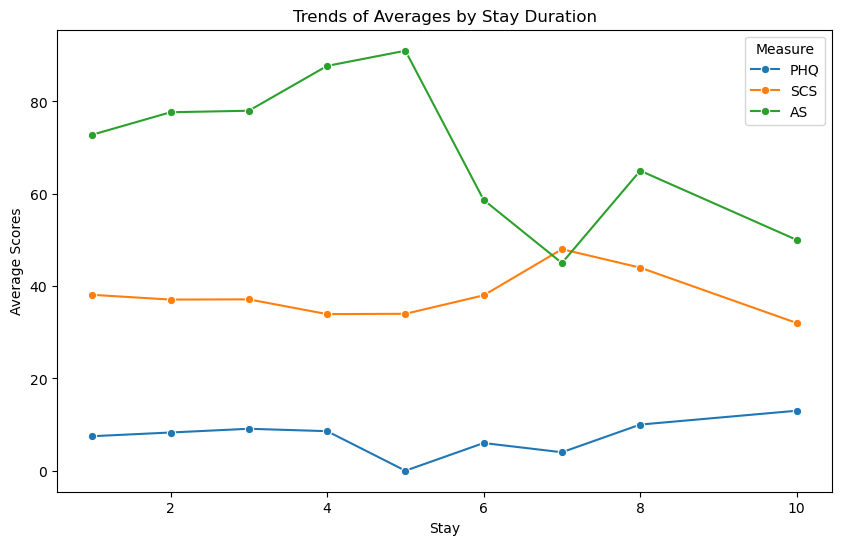

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='stay', y='average_phq', data=df, marker='o', label='PHQ')
sns.lineplot(x='stay', y='average_scs', data=df, marker='o', label='SCS')
sns.lineplot(x='stay', y='average_as', data=df, marker='o', label='AS')

plt.title('Trends of Averages by Stay Duration')
plt.xlabel('Stay')
plt.ylabel('Average Scores')
plt.legend(title='Measure')
plt.show()


### Magnitude and Distribution of Scores
_____

#### Heatmap: Visualizing Magnitude of Averages by Stay Duration

The heatmap below shows the magnitude of the average scores across different stay durations. Darker colors indicate higher values, while lighter colors indicate lower values.


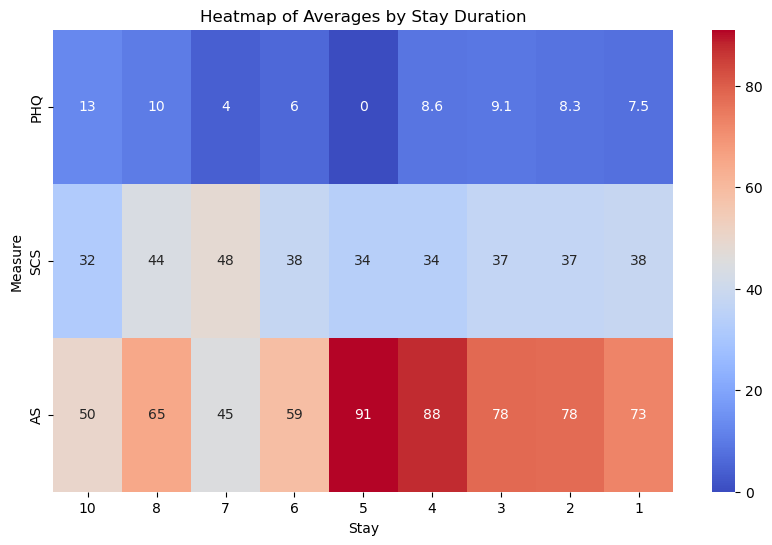

In [9]:
# Ensure the data is numeric
df[['average_phq', 'average_scs', 'average_as']] = df[['average_phq', 'average_scs', 'average_as']].astype(float)

plt.figure(figsize=(10, 6))
sns.heatmap(df[['average_phq', 'average_scs', 'average_as']].transpose(), 
            annot=True, cmap='coolwarm', xticklabels=df['stay'], yticklabels=['PHQ', 'SCS', 'AS'])
plt.title('Heatmap of Averages by Stay Duration')
plt.xlabel('Stay')
plt.ylabel('Measure')
plt.show()


#### Scatter Plot: Averages vs. Count of Individuals

The scatter plot below visualizes the relationship between the count of individuals for each stay duration and their corresponding average scores. Trend lines have been added to highlight any linear relationships between these variables.


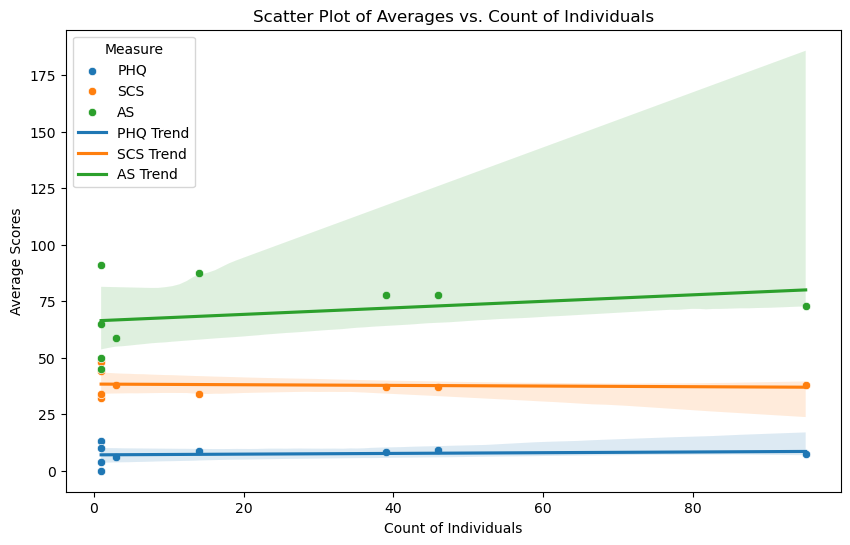

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='count_int', y='average_phq', data=df, label='PHQ')
sns.scatterplot(x='count_int', y='average_scs', data=df, label='SCS')
sns.scatterplot(x='count_int', y='average_as', data=df, label='AS')

# Adding trend lines
sns.regplot(x='count_int', y='average_phq', data=df, scatter=False, label='PHQ Trend')
sns.regplot(x='count_int', y='average_scs', data=df, scatter=False, label='SCS Trend')
sns.regplot(x='count_int', y='average_as', data=df, scatter=False, label='AS Trend')

plt.title('Scatter Plot of Averages vs. Count of Individuals')
plt.xlabel('Count of Individuals')
plt.ylabel('Average Scores')
plt.legend(title='Measure')
plt.show()


### Conclusion
_____

From this analysis, we observed the following key insights:
- **PHQ scores** tend to decrease as stay duration decreases, indicating that students with shorter stays may report fewer physical health concerns.
- **SCS and AS scores** show more variance across stay durations, suggesting that social connectedness and anxiety may fluctuate based on a student's length of stay.
- Shorter stays are associated with higher AS scores, indicating increased anxiety for students staying for shorter periods.

**Future Steps**  
Further research could involve:
- Comparing domestic and international students to identify differences in well-being based on nationality.
- Examining other factors, such as student demographics, to understand what influences the PHQ, SCS, and AS scores beyond stay duration.
